In [4]:
#from statsmodels.tsa.arima_process import ArmaProcess 
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pandas import Series
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import eye, asarray, dot, sum, diag
from scipy.linalg import svd
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import grangercausalitytests

import PCA_functions as pf
import Extreme_functions as ef

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, CMIknn
import tigramite.data_processing as pp


from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans

from statsmodels.tsa.stattools import adfuller
from Data import Data
from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import itertools
from collections import Counter
import pickle

from numpy import linalg as LA

import matplotlib.cm as cm

from scipy.special import inv_boxcox
from scipy import stats

from matplotlib import animation

import scipy.stats as st

import reverse_geocoder as rg

from pandas_datareader import wb
import scipy.stats as st

import Rung as rung

plt.rcParams["figure.figsize"] = (5,5)

from pandas_datareader import wb

import seaborn as sns

from sklearn import preprocessing

import seaborn as sns
import feature_finder_station as ff
import feature_finder1 as ff1
from statsmodels.tsa.stattools import adfuller

import more_itertools as mit

plt.rcParams["figure.figsize"] = (20,10)

In [2]:
def drought_prob(spi, states, level = 0.5):
    result = np.zeros(len(set(states)))
    for state in set(states):
        Idx = (states == state)
        sum_state = np.count_nonzero(Idx)
        n = np.count_nonzero(spi[Idx]>level)
        result[state] = n/sum_state
    return(result/sum(result))

In [3]:
def cluster_chart(clustering, cluster, level = 0.5): 
    I = list(np.where(clustering == cluster)[0])

    range_min = []
    range_max = []
    for group in mit.consecutive_groups(I):
        g = list(group)
        range_min.append(g[0])
        range_max.append(g[-1])

    plt.plot(count)
    
    plt.axhline(level)
    for i in range(len(range_min)):
        plt.axvspan(range_min[i], range_max[i], facecolor='grey', alpha=0.5)

In [5]:
temporal_limits = {"time_min":datetime(1922, 1, 1, 0, 0),"time_max":datetime(2015, 12, 1, 0, 0)}
count = ff1.drought_timeseries("ET_gamma_18912015.npy",1922,2015)
data_sst, ts, V, df_sst, avg, std = ff1.PCA_computer_rotated('../../../nc/sst.mnmean.nc', "sst",temporal_limits, 10, -9.96921e+36)

In [6]:
count = np.array(count)/303

In [7]:
clustering = AgglomerativeClustering(n_clusters=10).fit(data_sst)

In [10]:
clustering = KMeans(n_clusters=5).fit(data_sst)

In [16]:
prob = drought_prob(count, clustering.labels_, 0.6)

In [17]:
prob

array([0.        , 0.        , 0.23547401, 0.        , 0.        ,
       0.        , 0.76452599, 0.        , 0.        , 0.        ])

In [18]:
for i in range(len(prob)):
    print("cluster {}: Conditional probability of drought {:.2f}".format(i, prob[i]))

cluster 0: Conditional probability of drought 0.00
cluster 1: Conditional probability of drought 0.00
cluster 2: Conditional probability of drought 0.24
cluster 3: Conditional probability of drought 0.00
cluster 4: Conditional probability of drought 0.00
cluster 5: Conditional probability of drought 0.00
cluster 6: Conditional probability of drought 0.76
cluster 7: Conditional probability of drought 0.00
cluster 8: Conditional probability of drought 0.00
cluster 9: Conditional probability of drought 0.00


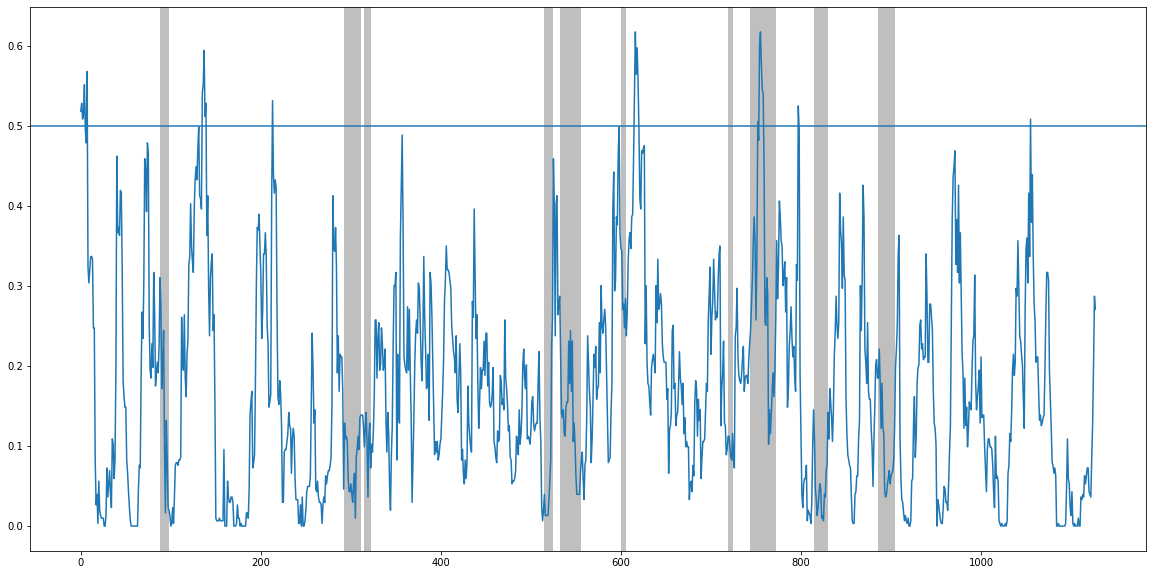

In [19]:
cluster_chart(clustering.labels_,6)

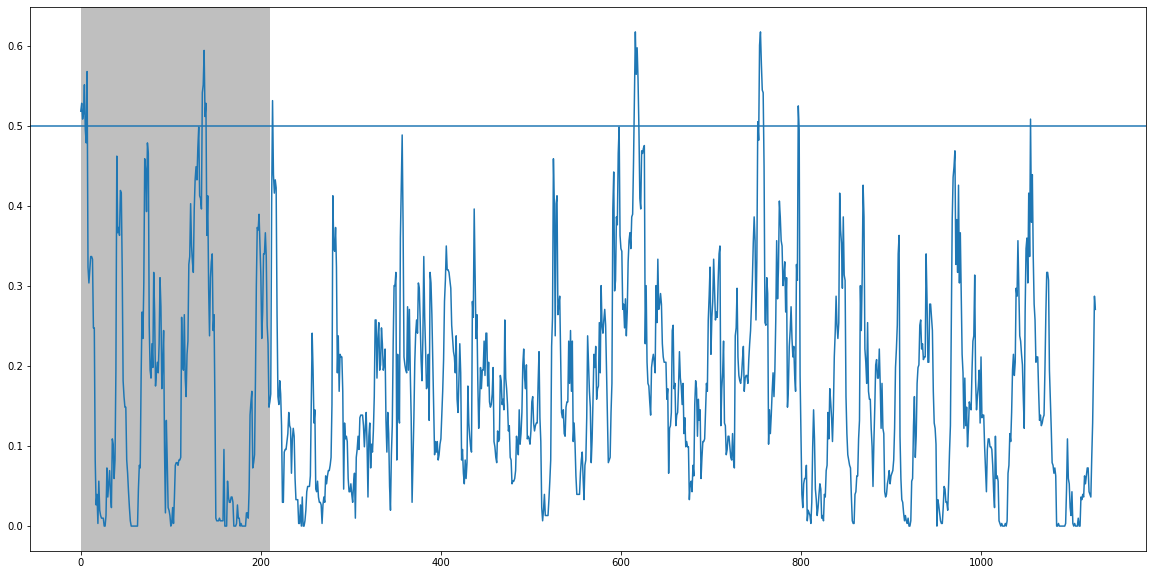

In [27]:
cluster_chart(clustering.labels_,1)

(array([131., 211., 192., 123., 146.,  88., 155.,  25.,  19.,  38.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

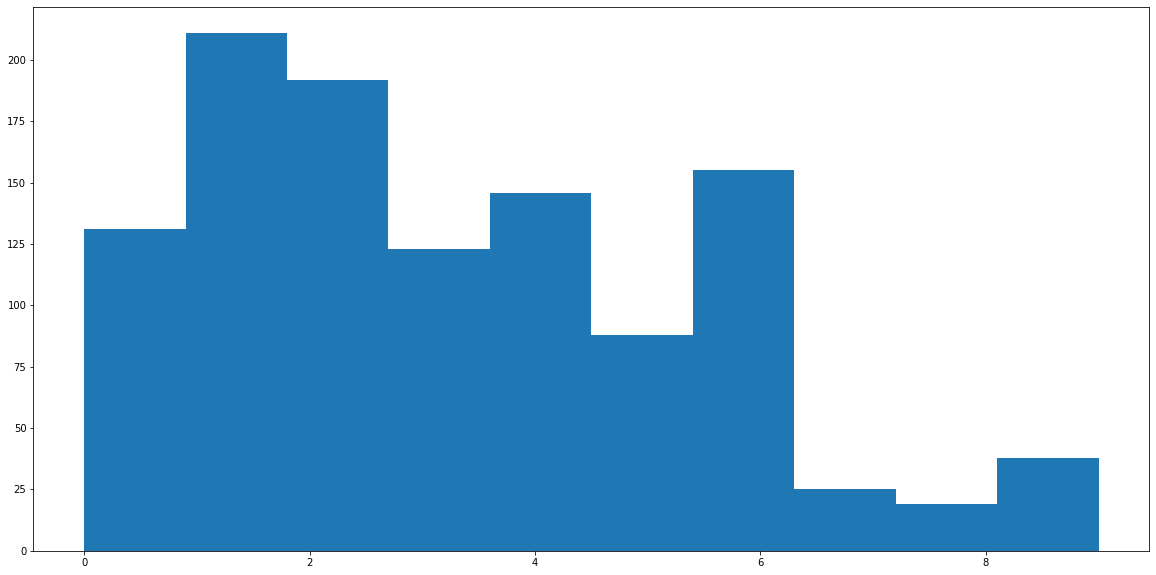

In [12]:
plt.hist(clustering.labels_)

In [21]:
def transition_matrix(transitions):
    n = 1+ max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

In [22]:
m = transition_matrix(clustering.labels_)
for row in m: print(' '.join('{0:.2f}'.format(x) for x in row))

0.95 0.00 0.01 0.00 0.01 0.00 0.02 0.00 0.01 0.01
0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.01 0.00 0.95 0.00 0.03 0.00 0.01 0.01 0.00 0.01
0.00 0.00 0.00 0.97 0.00 0.03 0.00 0.00 0.00 0.00
0.01 0.00 0.05 0.00 0.95 0.00 0.00 0.00 0.00 0.00
0.00 0.00 0.00 0.03 0.00 0.97 0.00 0.00 0.00 0.00
0.03 0.00 0.00 0.00 0.00 0.00 0.96 0.00 0.01 0.00
0.00 0.00 0.00 0.00 0.04 0.00 0.00 0.96 0.00 0.00
0.00 0.00 0.00 0.05 0.00 0.00 0.05 0.00 0.89 0.00
0.00 0.00 0.03 0.00 0.00 0.00 0.03 0.00 0.00 0.95


In [23]:
m = np.array(m)

In [24]:
m.shape

(10, 10)

In [25]:
r1  = np.matmul(prob,m)
for i in range(12):
    r1  = np.matmul(m,r1)

In [26]:
r1

array([0.30613721, 0.30815133, 0.05218551, 0.02054028, 0.0466752 ,
       0.04925411, 0.13757969, 0.01140683, 0.04164247, 0.03431507])

In [161]:
r1.min()

0.0

In [162]:
r1.max()

0.021346582970068376

In [16]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    AC = AgglomerativeClustering(n_clusters=k)
    AC = AC.fit(data_sst)
    Sum_of_squared_distances.append(AC.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

AttributeError: 'AgglomerativeClustering' object has no attribute 'inertia_'

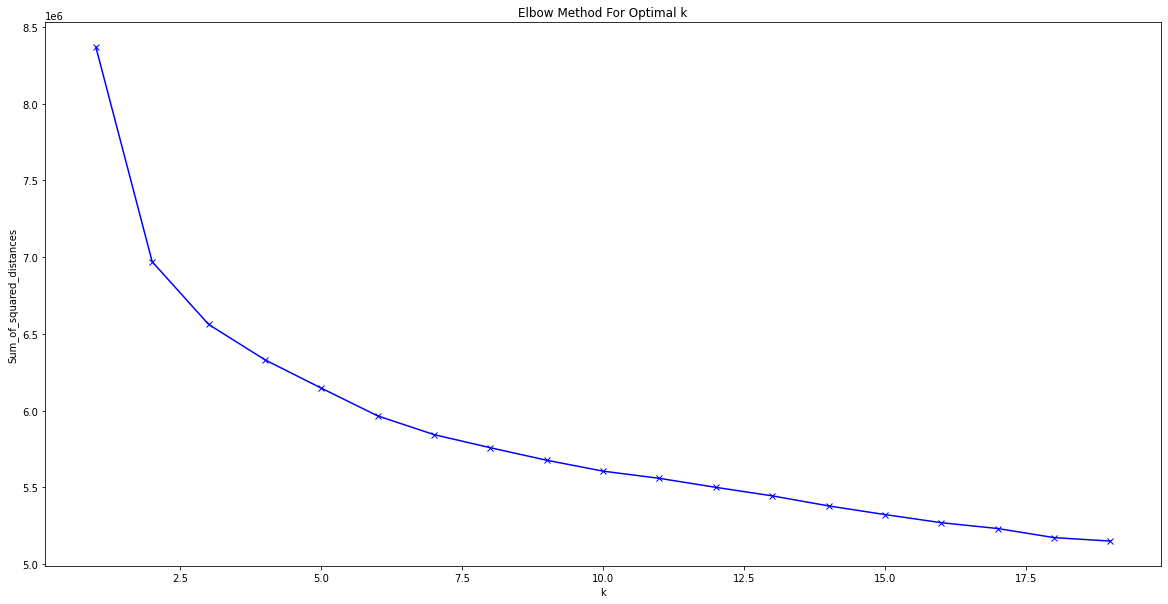

In [20]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_sst)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()